# Percolation simulation
In our percolation project, we simulate 2D grids with randomly opened (1) and closed (0) cells, and use Depth-First Search (DFS) to check if there's a connected path from the top to the bottom. We also analyze how the probability of percolation changes depending on the open-cell probability and visualize the results with a graph.

Time taken for grid size 10x10: 0.35 seconds
Time taken for grid size 20x20: 1.31 seconds
Time taken for grid size 50x50: 7.92 seconds
Time taken for grid size 100x100: 32.06 seconds


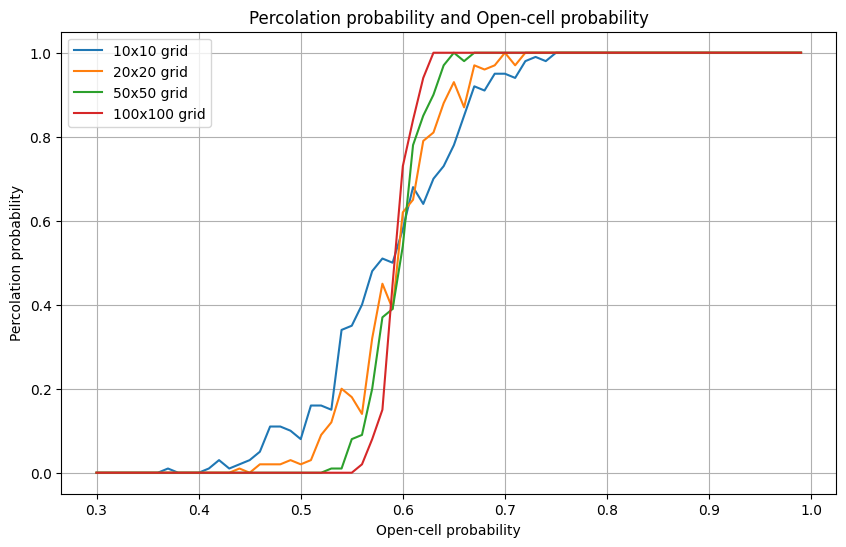

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
def generate_matrix(n, prob=0.5):
    size = n+2
    num_grid = n**2
    open_ratio = prob
    num_open = int(num_grid*open_ratio)

    flat = np.array([0]*(n**2-num_open)+[1]*num_open)

    np.random.shuffle(flat)
    matrix = np.zeros((size,size))

    matrix[1:-1, 1:-1] = flat.reshape((size - 2, size - 2))

    return matrix


def stack_check(matrix):
    n = len(matrix)
    stack = []
    visited = set()

    for x in range(1,n-1):
        if matrix[1][x]:
            stack.append((1,x))
            visited.add((1,x))

    directions = [(0,1),(1,0),(-1,0),(0,-1)]

    while stack:
        y,x = stack.pop()

        for dy,dx in directions:
            nexty,nextx=y+dy,x+dx
            if matrix[nexty][nextx] and (nexty,nextx) not in visited:
                stack.append((nexty,nextx))
                visited.add((nexty,nextx))
    return visited

def find_path(matrix, visited):
    n = len(matrix)
    expect = [(n-2,x) for x in range(1,n-1)]
    for i in visited:
        if i in expect:
            return True #if you need the percolation path, you swhich 'return visited'
    return False


def simulate_percolation(grid_sizes=[10, 20, 50, 100], prob=np.arange(0.3, 1.0, 0.01), trials=100): #trials-num of simulation for each probability
    plt.figure(figsize=(10, 6))

    for n in grid_sizes:
        start_time = time.time()
        results = []
        for p in prob:
            c= 0 #how many times percolation occured for grid and probilility pair
            for i in range(trials):
                matrix = generate_matrix(n, p)
                visited = stack_check(matrix)
                if find_path(matrix, visited):
                    c+= 1
            results.append(c/trials)
             #ratio of success percolation out of all trials
            end_time = time.time()
            elapsed_time = end_time - start_time
        print(f"Time taken for grid size {n}x{n}: {elapsed_time:.2f} seconds")
        plt.plot(prob, results, label=f"{n}x{n} grid")

    plt.xlabel("Open-cell probability")
    plt.ylabel("Percolation probability")
    plt.title("Percolation probability and Open-cell probability")
    plt.legend()
    plt.grid(True)
    plt.show()

simulate_percolation()

In [ ]:
def simulate_percolation(grid_sizes=[1000], prob=np.arange(0.5, 1.0, 0.1), trials=20):

    for n in grid_sizes:
        start_time = time.time()
        results = []
        for p in prob:
            c= 0
            for i in range(trials):
                matrix = generate_matrix(n, p)
                visited = stack_check(matrix)
                if find_path(matrix, visited):
                    c+= 1
            results.append(c/trials)
            end_time = time.time()
            elapsed_time = end_time - start_time
        print(f"Time taken for grid size {n}x{n}: {elapsed_time:.2f} seconds")

simulate_percolation()

Time taken for grid size 1000x1000: 76.22 seconds


In [3]:
# test
matrix = generate_matrix(5,0.6)
print(matrix)
sta = stack_check(matrix)
print(sta)
find_path(matrix,sta)


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
{(1, 2), (2, 1), (1, 1), (1, 4), (1, 3)}


False

In [4]:
# test
worst_matrix = generate_matrix(1000,1) #every cell is 1
sta2 = stack_check(worst_matrix)
find_path(worst_matrix,sta2)

True